# Proejct Preliminary Work - week 7

In [32]:
import numpy as np
import os
import struct
import requests
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt

import time

In [2]:
def get_number(byte):
    return int.from_bytes(byte, "big")
def parse_images(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        image_count = get_number(f.read(4))
        rows = get_number(f.read(4))
        cols = get_number(f.read(4))
        print("rows: ", rows, "cols", cols);
        images = np.zeros((image_count, rows, cols))

        current_img = 0
        current_row = 0
        current_col = 0

        while current_img < image_count:
            num = get_number(f.read(1))
            images[current_img, current_row, current_col] = num

            if current_row == rows - 1 and current_col == cols - 1:
                current_img += 1
                current_row = 0
                current_col = 0
            elif current_col == cols - 1:
                current_row += 1
                current_col = 0
            else:
                current_col += 1
    return images
def parse_labels(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        label_count = get_number(f.read(4))

        labels = np.zeros((label_count))
        current_label = 0

        while current_label < label_count:
            num = get_number(f.read(1))
            labels[current_label] = num
            current_label += 1

        return labels
def parse_data():
    train_images_path =os.path.abspath("train-images-idx3-ubyte")
    test_images_path = os.path.abspath("t10k-images-idx3-ubyte")

    train_labels_path =os.path.abspath("train-labels-idx1-ubyte")
    test_labels_path = os.path.abspath("t10k-labels-idx1-ubyte")

    x_train = parse_images(train_images_path)
    y_train = parse_labels(train_labels_path)

    x_test = parse_images(test_images_path)
    y_test = parse_labels(test_labels_path)

    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = parse_data()

rows:  28 cols 28
rows:  28 cols 28


In [4]:
def printIMG(index):
    for a in range(28):
        for b in range(28):
            print(1 if x_train[index][a][b] > 50 else 0, end=" ")
        print(" ")


In [5]:
for i in range(5):
    printIMG(i)
    print()


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0  
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 

In [6]:
x = y_train.reshape(-1,1)
dataframe = pd.DataFrame.from_records(x)
dataframe = dataframe.rename(columns={0:'digit'})
dataframe.head(3)

,digit
0,5.0
1,0.0
2,4.0


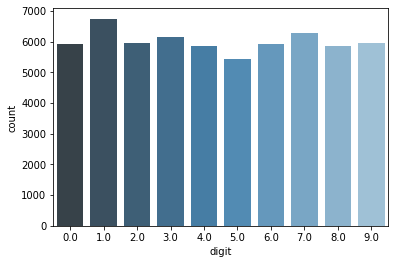

In [7]:
ax = sns.countplot(x=dataframe.iloc[:,0], data=dataframe, palette='Blues_d')
fig = ax.get_figure()
fig.savefig("train_digit.png")
ax

In [8]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 5923,
 1.0: 6742,
 2.0: 5958,
 3.0: 6131,
 4.0: 5842,
 5.0: 5421,
 6.0: 5918,
 7.0: 6265,
 8.0: 5851,
 9.0: 5949}

In [9]:
x_test = x_test.reshape(10000,-1)

In [10]:
x_train = x_train.reshape(60000,-1)

In [11]:
# knn = KNeighborsClassifier(n_neighbors=2)
# knn.fit(x_train,y_train)
# start_time = time.perf_counter()
# error_rate = 1-knn.score(x_test,y_test)
# end_time = time.perf_counter()
# total_time = round(end_time-start_time,3)

In [20]:
# np.arange(10,210,10)
# grid = {'n_estimators':np.arange(10,210,10)}
# rf = RandomForestClassifier()
# rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
# rfCV.fit(x_train,y_train)
# print('best n_estimators',rfCV.best_params_)
# print('validation R2',rfCV.best_score_.round(3))

best n_estimators {'n_estimators': 200}
validation R2 0.968


In [34]:
start_time = time.perf_counter()
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=200)
rfc.fit(x_train,y_train)
end_time = time.perf_counter()
score = rfc.score(x_test,y_test)
total_time = round(end_time-start_time,3)

In [35]:
print('Spend Time  ',total_time)

Spend Time   20.985


In [27]:
print('Test accuracy when n=10 ',score)

Test accuracy when n=10  0.9714


In [29]:
from sklearn.metrics import confusion_matrix

confusion_table = confusion_matrix(y_test.reshape(10000,1), rfc.predict(x_test))
confusion_table = confusion_table/np.sum(confusion_table,axis=1)
confusion_table

array([[9.87755102e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.36322870e-03, 4.17536534e-03, 9.72762646e-04,
        4.10677618e-03, 0.00000000e+00],
       [0.00000000e+00, 9.88546256e-01, 1.93798450e-03, 2.97029703e-03,
        0.00000000e+00, 2.24215247e-03, 2.08768267e-03, 0.00000000e+00,
        3.08008214e-03, 9.91080278e-04],
       [6.12244898e-03, 0.00000000e+00, 9.70930233e-01, 4.95049505e-03,
        2.03665988e-03, 0.00000000e+00, 4.17536534e-03, 7.78210117e-03,
        5.13347023e-03, 0.00000000e+00],
       [1.02040816e-03, 0.00000000e+00, 9.68992248e-03, 9.63366337e-01,
        0.00000000e+00, 8.96860987e-03, 0.00000000e+00, 8.75486381e-03,
        8.21355236e-03, 9.91080278e-04],
       [1.02040816e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.74541752e-01, 0.00000000e+00, 5.21920668e-03, 0.00000000e+00,
        3.08008214e-03, 1.58572844e-02],
       [2.04081633e-03, 0.00000000e+00, 0.00000000e+00, 8.91089109e-03,
   

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       980
         1.0       0.99      0.99      0.99      1135
         2.0       0.96      0.97      0.97      1032
         3.0       0.97      0.96      0.97      1010
         4.0       0.98      0.97      0.98       982
         5.0       0.97      0.97      0.97       892
         6.0       0.98      0.98      0.98       958
         7.0       0.97      0.96      0.97      1028
         8.0       0.96      0.96      0.96       974
         9.0       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



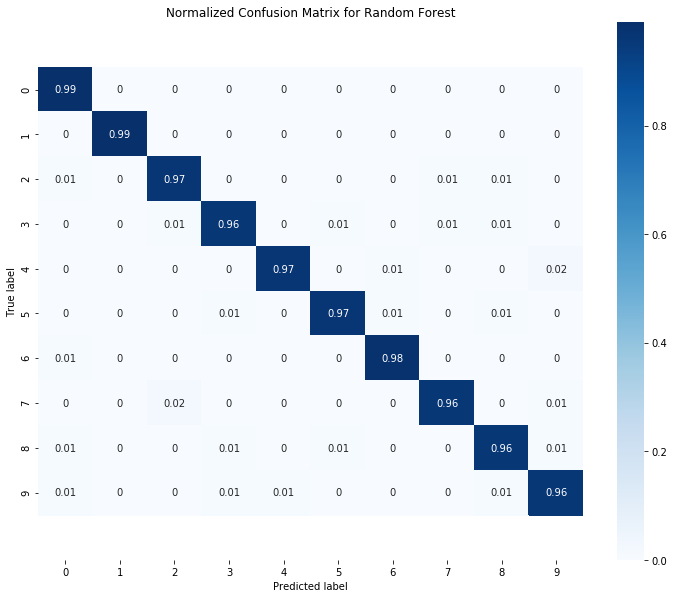

In [33]:
import seaborn as sns
plt.figure(figsize = (10,8))
np.set_printoptions(precision=2)
ax = sns.heatmap(confusion_table.round(2), annot=True,cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 1, top - 1)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for Random Forest')
plt.savefig('Normalized Confusion Matrix for Random Forest')
plt.show()